In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, LeakyReLU
from tensorflow.keras.initializers import RandomNormal, Constant
from tensorflow.keras.utils import plot_model
import cv2
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import pickle
from keras.models import Sequential

In [2]:
img_height = 300
img_width = 300
batch_size = 4

In [3]:
age_set = []
gender_set = []
race_set = []
face_img_pixels_set = []
path = "./FaceRecognitionDataset"
dir_list = os.listdir(path)

for img_dir in dir_list:
    try:
        img_path = "./FaceRecognitionDataset"
        img_path += "/" + img_dir
        face_img_dir = os.listdir(img_path)
        for face_img in face_img_dir:
            if ".jpg" in face_img:
                face_img_split = face_img.split("_")
                age_set_str_int = face_img_split[0]
                age_set_str_int = int(age_set_str_int)
                age_set.append(age_set_str_int)
                gender_set_str_int = face_img_split[1]
                gender_set_str_int = int(gender_set_str_int)
                gender_set.append(gender_set_str_int)
                race_set_str_int = face_img_split[2]
                race_set_str_int = int(race_set_str_int)
                race_set.append(race_set_str_int)
                face_img_path = img_path + "/" + face_img
                face_img_pixels = cv2.imread(face_img_path)
                dim = (img_height, img_width)
                img_resize = cv2.resize(face_img_pixels, dim)
                cv2.imwrite(face_img_path, img_resize) 
                face_img_pixels_resized = cv2.imread(face_img_path)
                face_img_pixels_set.append(face_img_pixels_resized)     
    except:
        pass

In [4]:
len(face_img_pixels_set)
face_img_pixels_set = np.stack(face_img_pixels_set)

In [5]:
print(face_img_pixels_set.shape)

(42199, 300, 300, 3)


In [6]:
race_set = np.array(race_set)

In [7]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [8]:
print()

In [9]:
pixel_data_train, pixel_data_test, race_data_train, race_data_test = train_test_split(face_img_pixels_set, race_set, 
                                                                                        test_size = 0.2, random_state=123)
pixel_data_train, pixel_data_val, race_data_train, race_data_val = train_test_split(pixel_data_train, race_data_train,
                                                                                     test_size = 0.25,  random_state=123)

In [10]:
normalization_layer = layers.Rescaling(1./255)

In [11]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Dense(256,activation = 'relu'),
  layers.Dropout(0.5),
  layers.Dense(1,activation = 'sigmoid'),
  layers.Conv2D(64, (3,3), padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(64, (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
  layers.BatchNormalization(),
  layers.Conv2D(128, (3,3), padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(128, (3,3), padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
  layers.BatchNormalization(),
  layers.Conv2D(256, (3,3), padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(256, (3,3), padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(256, (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
  layers.BatchNormalization(),
  layers.Conv2D(512, (3,3), padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(512, (3,3), padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(512, (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
  layers.BatchNormalization(),
  layers.Conv2D(512, (3,3), padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(512, (3,3), padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(512, (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    BatchNormalization(
        momentum=0.95, 
        epsilon=0.005,
        beta_initializer=RandomNormal(mean=0.0, stddev=0.05), 
        gamma_initializer=Constant(value=0.9)
  ),
  layers.Flatten(),
  layers.Dense(4096, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(4096, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(num_classes, activation='softmax'),
])

# model = Sequential([
#   data_augmentation,
#   layers.Rescaling(1./255),
#   layers.Conv2D(16, (3,3), padding='same', activation='relu'),
#   layers.MaxPooling2D(pool_size=(2,2)),
#   layers.BatchNormalization(),
#   layers.LeakyReLU(),
#   layers.Conv2D(32, (3,3), padding='same', activation='relu'),
#   layers.MaxPooling2D(pool_size=(2,2)),
#   layers.BatchNormalization(),
#   layers.LeakyReLU(),
#   layers.Conv2D(64, (3,3), padding='same', activation='relu'),
#   layers.MaxPooling2D(pool_size=(2,2)),
#   layers.BatchNormalization(),
#   layers.LeakyReLU(),
#   layers.Conv2D(64, (3,3), padding='same', activation='relu'),
#   layers.MaxPooling2D(pool_size=(2,2)),
#   layers.BatchNormalization(),
#   layers.LeakyReLU(),
#   layers.Conv2D(128, (3,3), padding='valid', activation='relu'),
#   layers.MaxPooling2D(pool_size=(2,2)),
#   layers.BatchNormalization(),
#   layers.Flatten(),
#   layers.Dense(128, activation='softmax'),
#   BatchNormalization(
#         momentum=0.95, 
#         epsilon=0.005,
#         beta_initializer=RandomNormal(mean=0.0, stddev=0.05), 
#         gamma_initializer=Constant(value=0.9)
#   ),
#   layers.LeakyReLU(),
#   layers.Dropout(0.2),
#   layers.Dense(num_classes)
# ])

# model = Sequential([
#   data_augmentation,
#   layers.Rescaling(1./255),
#   layers.Conv2D(16, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Conv2D(32, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Conv2D(64, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Dropout(0.2),
#   layers.Flatten(),
#   layers.Dense(128, activation='relu'),
#   layers.Dense(num_classes)
# ])

In [12]:
learning_rate = 0.01
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy', 'mse', 'mae', 'mape'])

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 300, 300, 3)       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 300, 300, 3)       0         
_________________________________________________________________
dense (Dense)                (None, 300, 300, 256)     1024      
_________________________________________________________________
dropout (Dropout)            (None, 300, 300, 256)     0         
_________________________________________________________________
dense_1 (Dense)              (None, 300, 300, 1)       257       
_________________________________________________________________
conv2d (Conv2D)              (None, 300, 300, 64)      640       
_________________________________________________________________
batch_normalization (BatchNo (None, 300, 300, 64)     

In [14]:
plot_model(model)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [15]:
EPOCHS = 30
BS = 1
aug = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range = 20, zoom_range = 0.15,
            width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.15,
            horizontal_flip = True, fill_mode = "nearest")

In [16]:
# X = tf.data.Dataset.from_tensor_slices(pixel_data_train)
# X = X.batch(4)
# X = tf.convert_to_tensor(pixel_data_train)
# print(X.shape)
# Y = tf.convert_to_tensor(race_data_train, dtype=tf.float32)

try:
  with tf.device('/device:GPU:0'):
      Y = tf.convert_to_tensor(race_data_train, dtype=tf.float32)
      history_aug = model.fit_generator(aug.flow(pixel_data_train.astype('float32'), Y, batch_size = BS),
                    validation_data=(pixel_data_val, race_data_val), steps_per_epoch=len(pixel_data_train) // BS,
                    epochs = EPOCHS)
except RuntimeError as e:
  print(e)

C:\Users\abhakta22\Miniconda3\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30


C:\Users\abhakta22\Miniconda3\lib\site-packages\keras\backend.py:4906: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


25319/25319 [==============================] - ETA: 0s - loss: 96.8766 - accuracy: 0.3833 - mse: 3.4448 - mae: 1.3750 - mape: 77583368.0000

ResourceExhaustedError:  OOM when allocating tensor with shape[2880000,256] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node sequential_1/dense/Tensordot/MatMul (defined at \ABHAKT~1\AppData\Local\Temp/ipykernel_11356/1640094588.py:10) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_test_function_132195]

Function call stack:
test_function


In [ ]:
print(tf.__version__)

2.6.0


In [ ]:
# model.save('baseline-cnn-updated.h5')

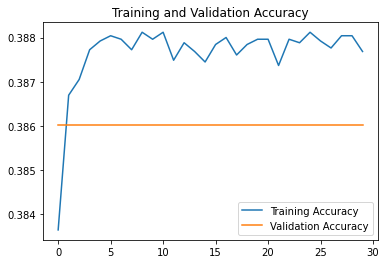

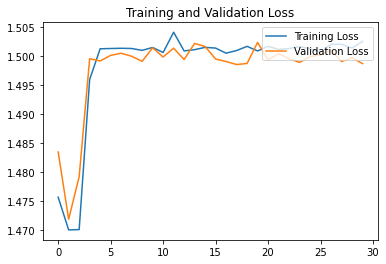

In [ ]:
acc = history_aug.history['accuracy']
val_acc = history_aug.history['val_accuracy']

loss = history_aug.history['loss']
val_loss = history_aug.history['val_loss']

epochs_range = range(EPOCHS)

plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# with open('pixelset.pkl', 'wb') as f:
#     pickle.dump(face_img_pixels_set, f)

In [ ]:
# with open('raceset.pkl', 'wb') as f:
#     pickle.dump(race_set, f)